# Kaggle's Heart Disease UCI Dataset Project



- In this project I will overview and analyse the UCI's Heart Disease Dataset using 14 already pre-choosen features/attributes from a total of 76 that the original Database contain.


- Will start by doing some features correlations, going through some quick plot visualizations, analysing them and getting some conclusions. And then will proceed to apply several ML models to see which yields better results and finishing with a basic DNN Classifier model:
    
    
    * Logistic Regression
    * KNN Classifier
    * Decision Tree
    * Random Forest Classifier
    * SVM (Support Vector Machine) ( SVC() )
    * Kmeans
    * Some basic DNN Classifier experiment



### Context

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the **Cleveland** database is the only one that has been used by ML researchers to this date. The "target" field refers to the presence of heart disease in the patient


### Data description:

- age - age in years 
- sex - (1 = male; 0 = female) 
- cp - chest pain type
    - Value 1: typical angina 
    - Value 2: atypical angina 
    - Value 3: non-anginal pain 
    - Value 4: asymptomatic     
- trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
- chol - serum cholestoral in mg/dl 
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
- restecg - resting electrocardiographic results 
- thalach - maximum heart rate achieved 
- exang - exercise induced angina (1 = yes; 0 = no) 
- oldpeak - ST depression induced by exercise relative to rest 
- slope - the slope of the peak exercise ST segment
    - Value 1: upsloping 
    - Value 2: flat 
    - Value 3: downsloping 
- ca - number of major vessels (0-3) colored by flourosopy 
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
- target - have disease or not (1=yes, 0=no)

source: https://www.kaggle.com/ronitf/heart-disease-uci

### Acknowledgements

#### Creators: 

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploraty Data Analysis

In [2]:
# Creating the Data Frame

df = pd.read_csv("./data/heart.csv")

In [3]:
# Visualizing DataFrame's first 5 rows

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Basic Data Frame's features info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
# Getting some general statistic data

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\André\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\André\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


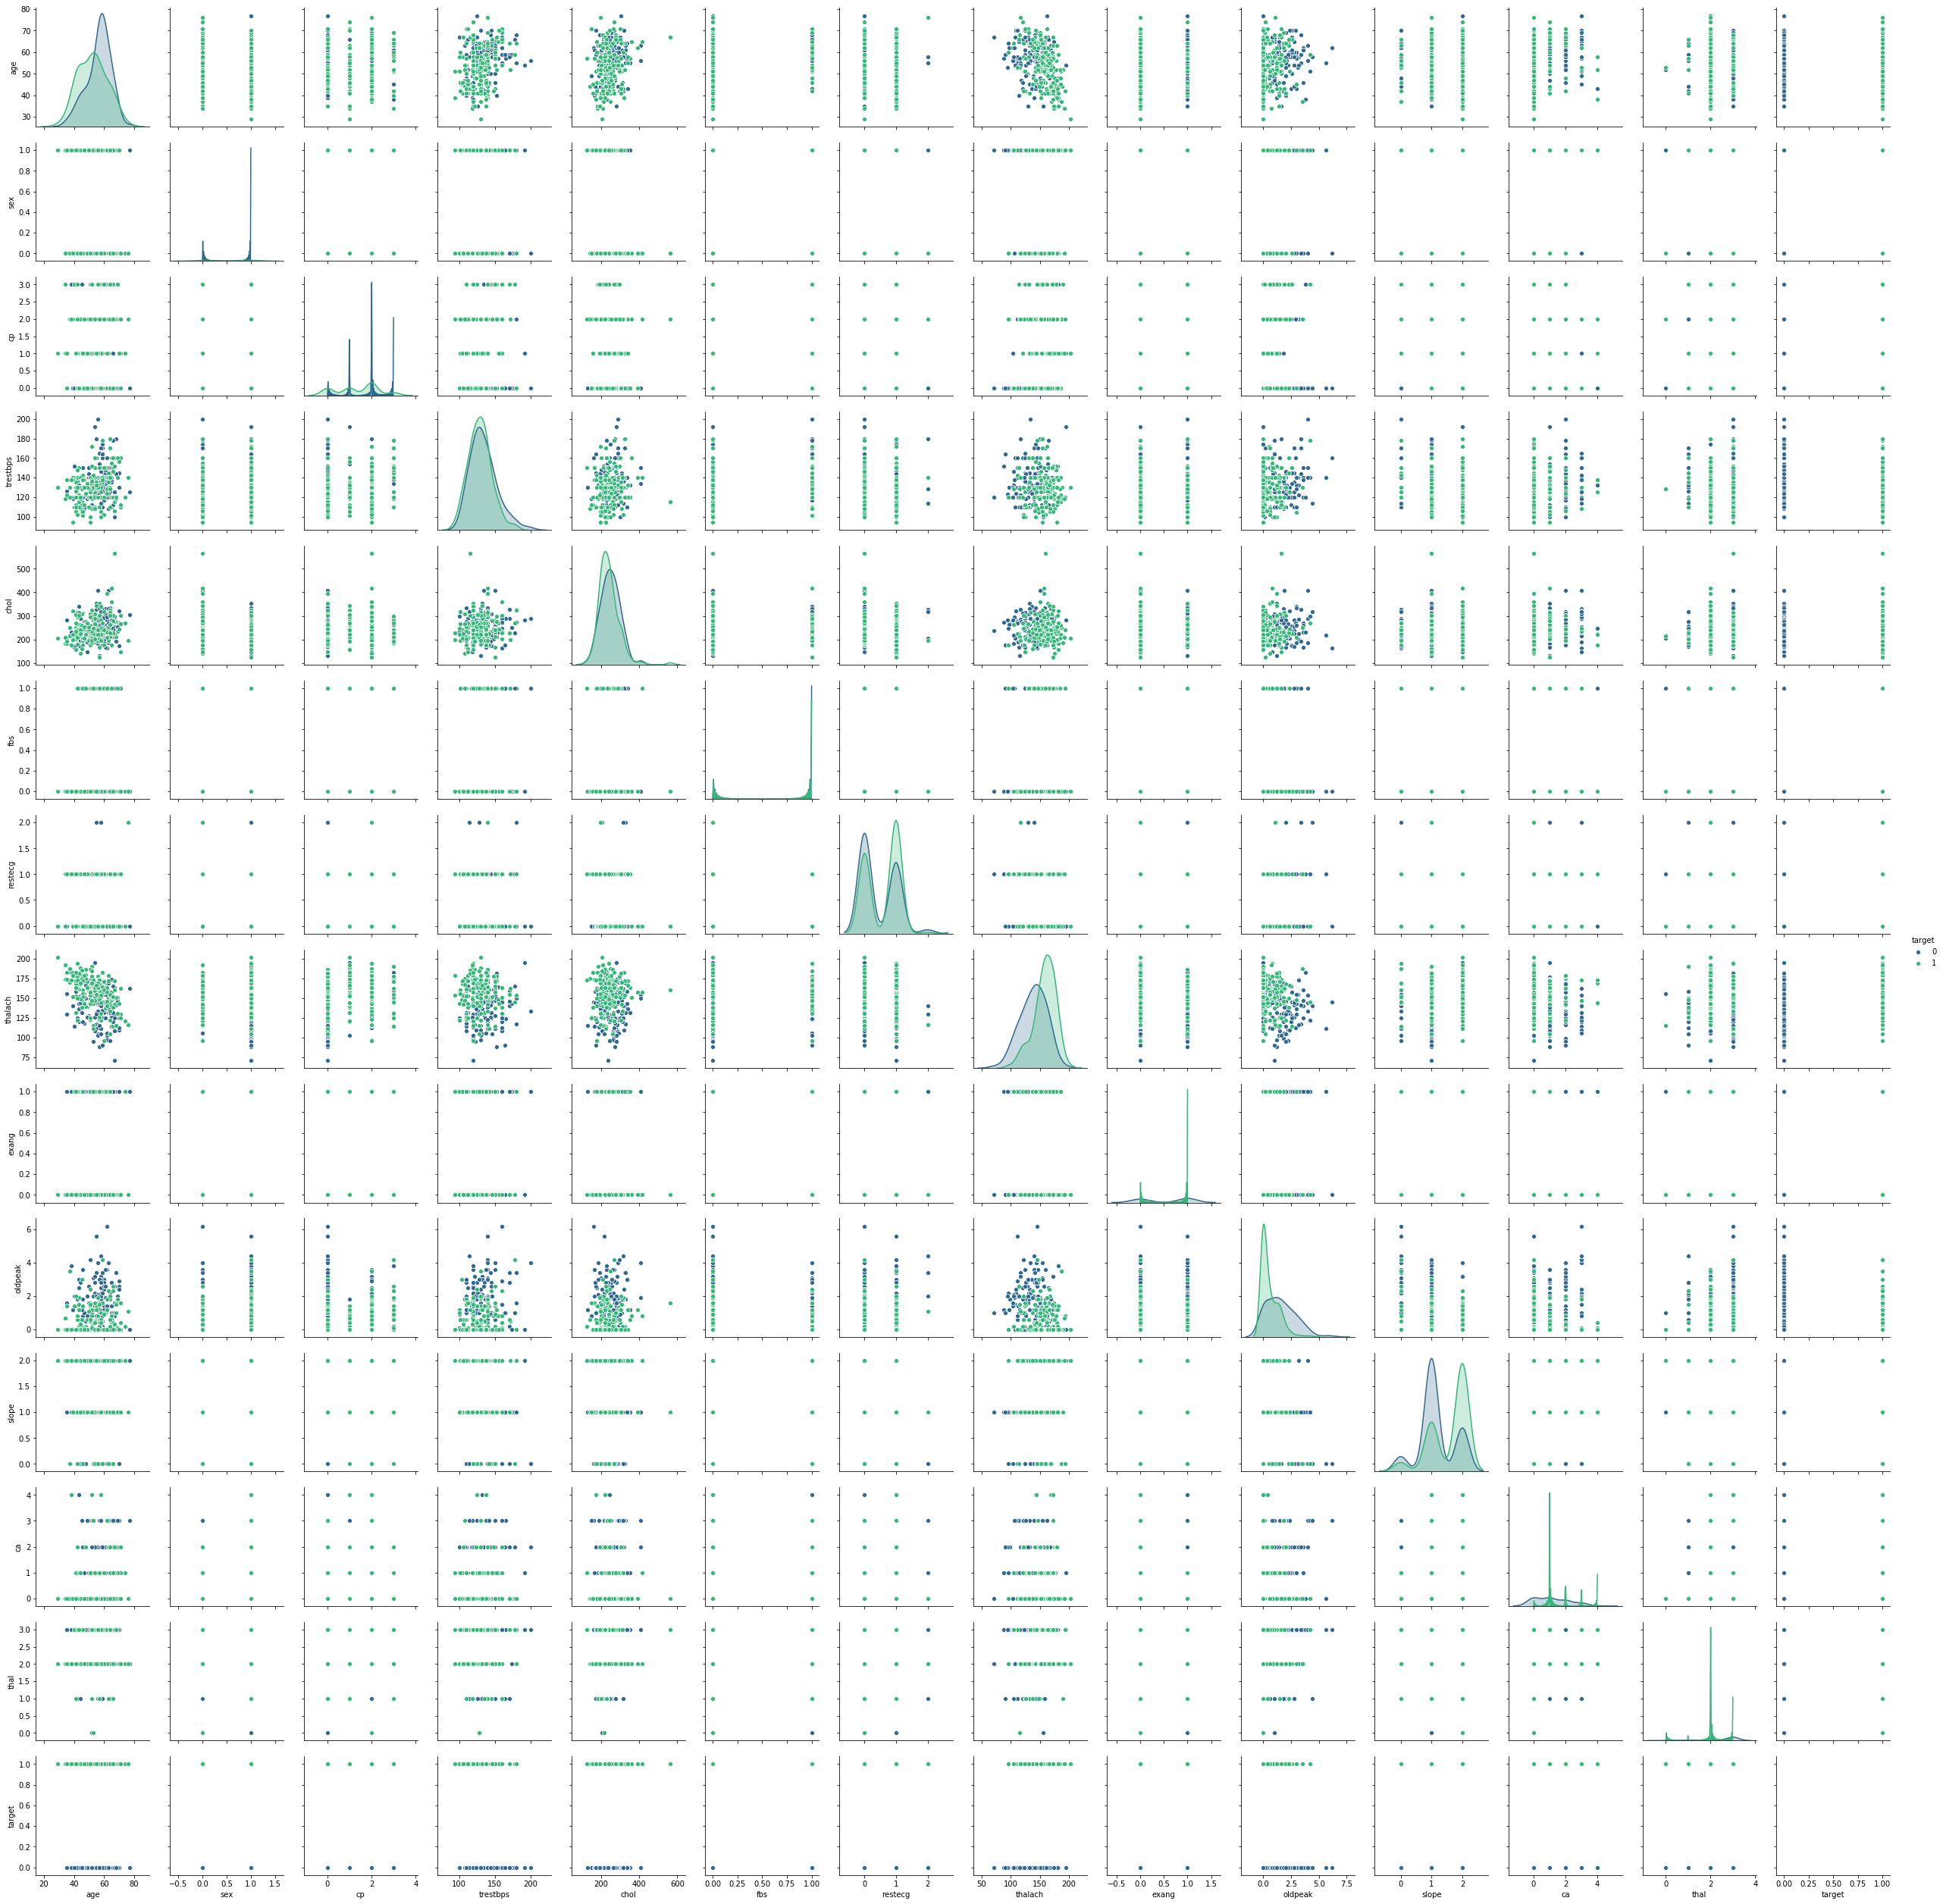

In [6]:
# Visualizing some plots and data correlations 

sns.pairplot(df,hue="target",palette="viridis")

In [23]:
# Creating data correlation DataFrame

df_corr = df.corr()

In [24]:
# Visualizing Correlation DataFrame first 5 rows

df_corr.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239


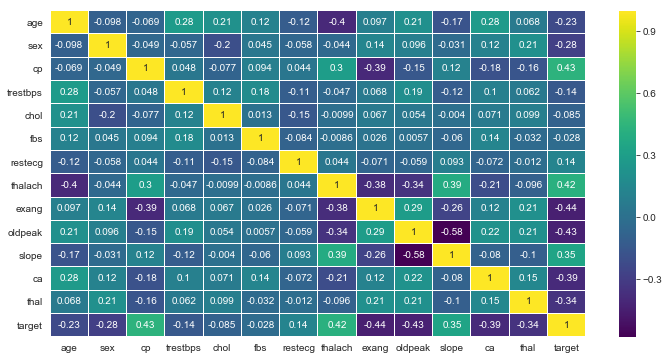

In [25]:
# Visualizing correlations

plt.figure(figsize=(12,6))
sns.heatmap(df_corr,cmap="viridis",linecolor="w",linewidths=0.01,annot=True)

### Correlation analysis

* What I can conclude is that most correlated features (from the 14 features used including the 'target' column) are:

    * **cp** - **target** (Chest Pain - Disease Carrier or not)
    * **thalach** - **target** (Maximum heart rate achieved - Disease Carrier or not)
    * **thalach** - **slope** (Maximum heart rate achieved - Slope of the peak exercise ST segment)
    * **oldpeak** - **exang** (ST depression induced by exercise relative to rest - exercise induced angina (1 = yes; 0 = no))


* Let's start by analysing and plotting some visualizations of those correlated features

## Analysing data by Chest Pain Type (cp)

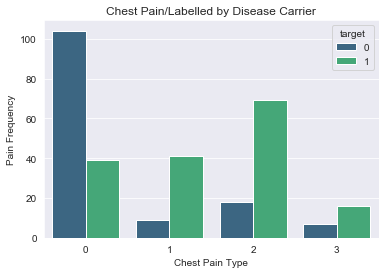

In [7]:
# Plotting the Pain Frequency sorted by Chest Pain Type and labelled by Disease Carrier or not

sns.set_style("darkgrid")
sns.countplot(df["cp"],hue=df["target"],palette="viridis")
plt.xlabel("Chest Pain Type")
plt.ylabel("Pain Frequency")
plt.title("Chest Pain/Labelled by Disease Carrier");

#### Conclusions:


* For non-Disease Carriers the most common Chest Pain Type was Value 1: Typical Angina


* While for Disease Carriers the most common one was Value 3: non-anginal pain


* As the severity of **Chest Pain Type** increases also the number of cases of **Disease Carriers** vs **non-Carriers**; except for **Chest Pain Type Value 4: asymptomatic** wich was the **Chest Pain Type** with less decerpency between **Disease Carriers** vs **non-Carriers**


* The conclusion here is that as the **Chest Pain Type** severity increases also the probability of being a **Disease Carrier** increases

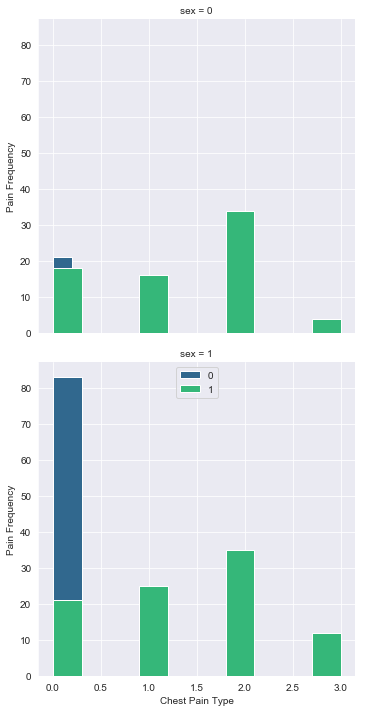

In [8]:
# First plot refers to Female and the second one is Male while we plot Chest Pain Type Frequency (cp)

g =sns.FacetGrid(data=df,row="sex",hue="target",height=5,aspect=1,palette="viridis")
g.map(plt.hist, "cp")
g.set_axis_labels(x_var="Chest Pain Type", y_var="Pain Frequency")
plt.legend(loc=9)

#### Conclusions:

* This dataset got much more samples of **Male non-Disease Carriers** vs **Female non-Disease Carriers** (wich will be more clear from a later countplot() by gender)

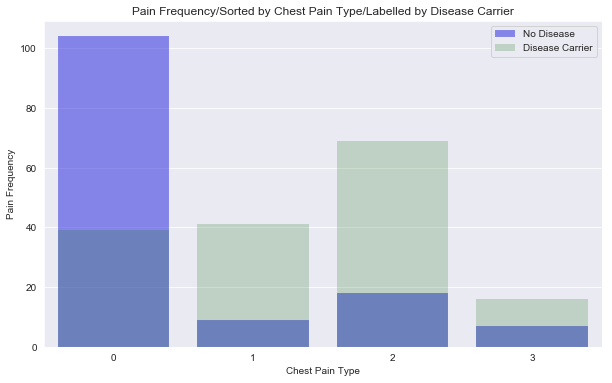

In [9]:
# Plotting the Chest Pain Type Frequency (cp) regarding having the disease or not

plt.figure(figsize=(10,6))
sns.countplot(df[df["target"]==0]["cp"],label="No Disease",color="blue",linewidth=0.1,alpha=0.5)
sns.countplot(df[df["target"]==1]["cp"],label="Disease Carrier",color="green",linewidth=0.1,alpha=0.2)
plt.xlabel("Chest Pain Type")
plt.ylabel("Pain Frequency")
plt.title("Pain Frequency/Sorted by Chest Pain Type/Labelled by Disease Carrier")
plt.legend();

#### Conclusions:

* Here the same plot as the 1st plot previous analysed 

C:\Users\André\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


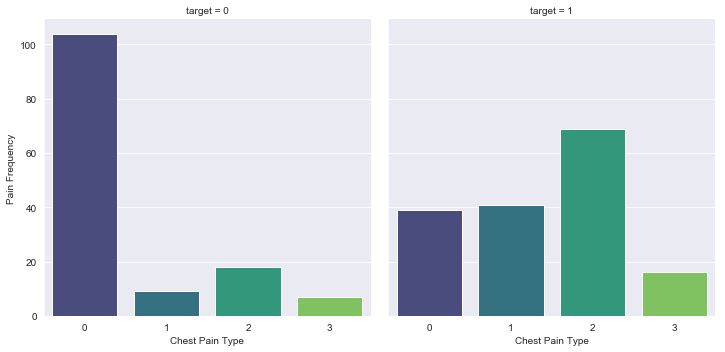

In [10]:
# Here is a understandable/explicit separation of Chest Pain Type Frequency (cp) where the left plot refers to non-disease carriers

g = sns.FacetGrid(data=df,col="target",height=5,aspect=1)
g.map(sns.countplot,"cp",palette="viridis")
g.set_axis_labels(x_var="Chest Pain Type",y_var="Pain Frequency");

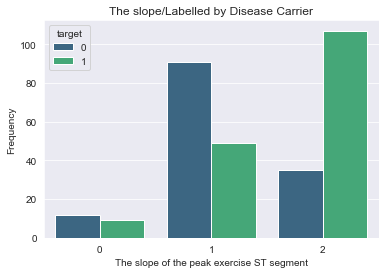

In [11]:
sns.set_style("darkgrid")
sns.countplot(df["slope"],hue=df["target"],palette="viridis")
plt.xlabel("The slope of the peak exercise ST segment")
plt.ylabel("Frequency")
plt.title("The slope/Labelled by Disease Carrier");

#### Conclusion:

* So, first thing to point here is that after some investigation I was able to determine that **slope** refers to the following test:


    * "Eight patients with coronary heart disease were studied during two periods of exercise separated by 30 min of rest; workload was increased in a stepwise fashion every minute of exercise up to a level that produced limiting symptoms of angina, fatigue, or dyspnea. The magnitude of ST-segment depression and the central aortic pressure were measured during exercise and recovery periods, and myocardial oxygen requirements were estimated by the pressure-time index (systolic aortic pressure X heart rate X ejection time)."    (from summary of research papers)


source: https://www.ahajournals.org/doi/pdf/10.1161/01.CIR.42.4.593


* By **Value 1: Upsloping**, **Value 2: Flat** and **Value 3: Downsloping**, I conclude that (generally speaking) **"upsloping"** is when (analysing a ECG) the "heart rate line" is **greater/increasing** (abnormal) after a heart pump creating a **"upsloping ST segment"**, and the same goes for **Value 3: Downsloping** as for **Value 2: Flat**, it just refers to the **degree/amplitude** of the "heart rate line" after a heart pump; being **"flat"** (kinda more horizontal) meaning that it's neither **concave** nor **convex**


* So with all this info the conclusion is that there are very few cases where there was an **"upsloping ST segment"** (**Value 1: Upsloping**)


* While the **Value 2: Flat** providing the info that we got almost 2x **non-Disease Carriers** vs **Disease Carriers** with a **"flat"** (you can see it as **"horizontalish" line**) "heart rate line" after a heart pump, with this I get that **concave** or **convex** "heart rate line" (**Value 3: Downsloping**) after a heart pump are probably more connected to Disease Carriers


* Finally for the **Value 3: Downsloping** without no doubt it is a **major symptom** for having the **heart disease** as we have almost 3x **Disease Carrier** cases vs **non-Disease Carrires**, with **downsloaping** being when (analysing a ECG) the "heart rate line" is **smaller/decreasing** (abnormal) after a heart pump creating a **"downsloping ST segment"**

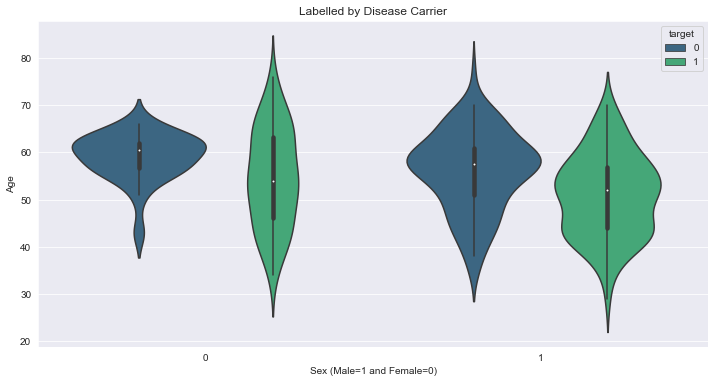

In [12]:
# Visualizing the Age per Gender distribution labelled by disease carrier or not

plt.figure(figsize=(12,6))
sns.violinplot(x=df["sex"],y=df["age"],hue=df["target"],palette="viridis")
plt.xlabel("Sex (Male=1 and Female=0)")
plt.ylabel("Age")
plt.title("Labelled by Disease Carrier");

#### Conclusions:

* For **non-Disease Carrier** there is (both **Male** and **Female**) a big concentration of people between 50 and 70


* While for **Female Disease Carriers** we got the *distribution* more homogeneous/better distributed for the **Male Disease Carriers** case we can see that our cases concentrate mainly between 40 and 60


* Analysing (by our samples) the **disease** tend to appear/to be hosted by **middle aged people** (as for **Female** tend to be more distributed/linear)

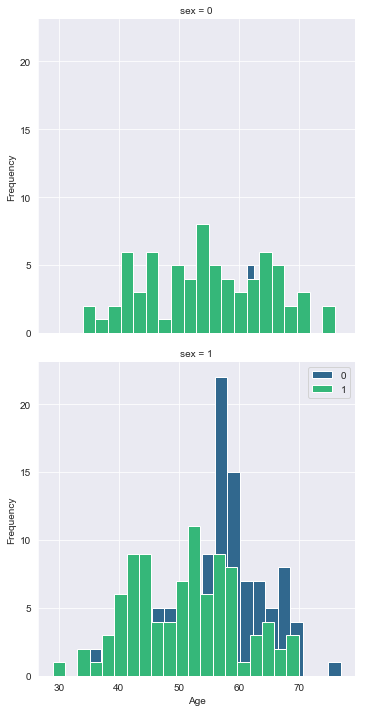

In [13]:
# Plotting the Age distribution labelled by disease carrier or not; where the first row = Female and the second one refers to Male

g = sns.FacetGrid(data=df,row="sex",hue="target", height=5, aspect=1,palette="viridis")
g.map(plt.hist,"age",bins=20)
g.set_axis_labels(x_var="Age",y_var="Frequency")
plt.legend(loc=0)

## Now let's do a quick analysis to Maximum heart rate achieved (thalach)

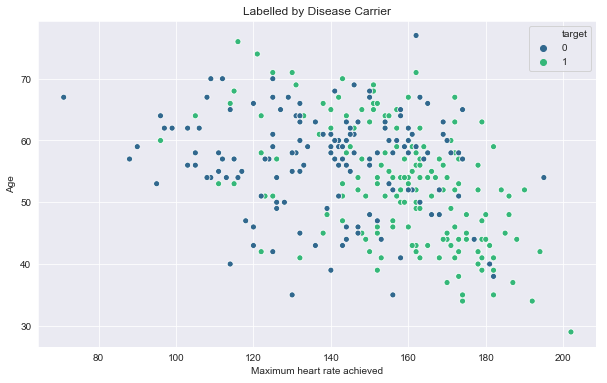

In [14]:
# Plotting the Maximum heart rate achieved (thalach) by Age and labelled by disease carrier or not

plt.figure(figsize=(10,6))
sns.scatterplot(x="thalach",y="age",data=df,hue="target",palette="viridis")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Age")
plt.title("Labelled by Disease Carrier");

#### Conclusions:


* As the **Maximum heart rate achieved** increases also the number of **Disease Carriers** increse and the **non-Disease Carriers** decrease


* And interestingly, also as the **Maximum heart rate achieved** increases slowly the **Age** (y axis) drops (to younger subjects) as long with the **Disease Carriers** numbers increasing vs **non-Disease Carriers**

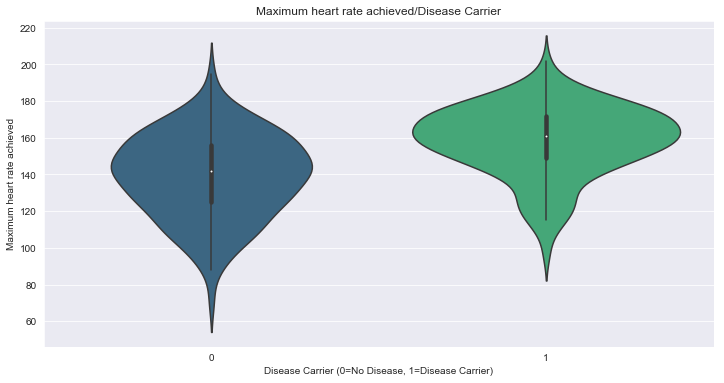

In [15]:
# Plotting the Maximum heart rate achieved (thalach) distribution sorted by Disease Carrier or not

plt.figure(figsize=(12,6))
sns.violinplot(x=df["target"],y=df["thalach"],palette="viridis")
plt.xlabel("Disease Carrier (0=No Disease, 1=Disease Carrier)")
plt.ylabel("Maximum heart rate achieved")
plt.title("Maximum heart rate achieved/Disease Carrier");

#### Conclusions:


* Higher **Maximum heart rate achieved** values (slightly between 140 and 180/190 BPMs) refers/correlates more to **Disease Carriers** observing at the **Disease Carriers distribution/deviance** (green violin plot)

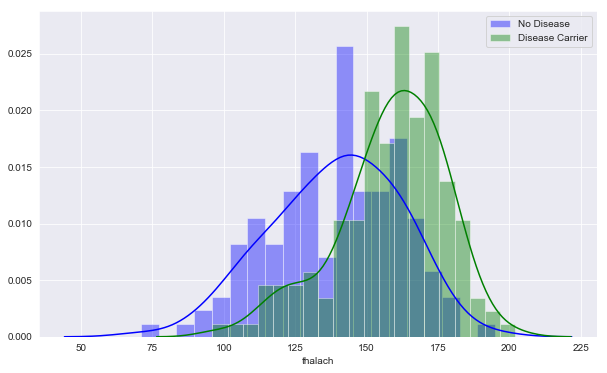

In [16]:
# Here is a more detailed plot of the above one

plt.figure(figsize=(10,6))
sns.distplot(df[df["target"]==0]["thalach"],bins=20,label="No Disease",color="blue")
sns.distplot(df[df["target"]==1]["thalach"],bins=20,label="Disease Carrier",color="green")
plt.legend()

#### Conclusions:


* Again, higher **Maximum heart rate achieved** (**thalach**) values refers more/have more cases of **Disease Carriers** vs **non-Disease Carriers**

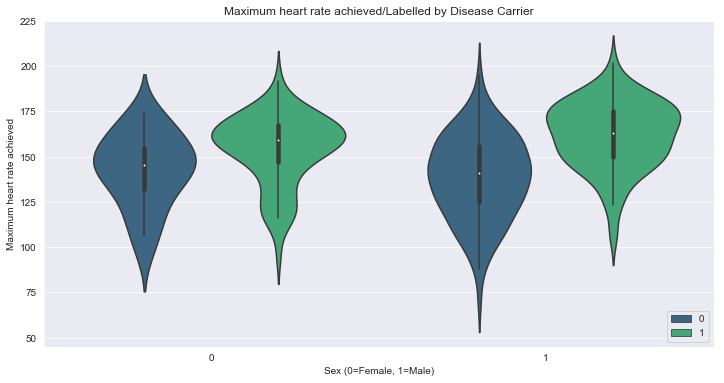

In [17]:
# Plotting the Maximum heart rate achieved (thalach) distribution sorted by Gender and labelled by Disease Carrier or not

plt.figure(figsize=(12,6))
sns.violinplot(x=df["sex"],y=df["thalach"],hue=df["target"],palette="viridis")
plt.xlabel("Sex (0=Female, 1=Male)")
plt.ylabel("Maximum heart rate achieved")
plt.title("Maximum heart rate achieved/Labelled by Disease Carrier")
plt.legend(loc=4);

#### Conclusions:


* Same plot but this time sorted by Gender, where we can see a pattern on higher **Maximum heart rate achieved** being related to the **Disease Carriers** cases

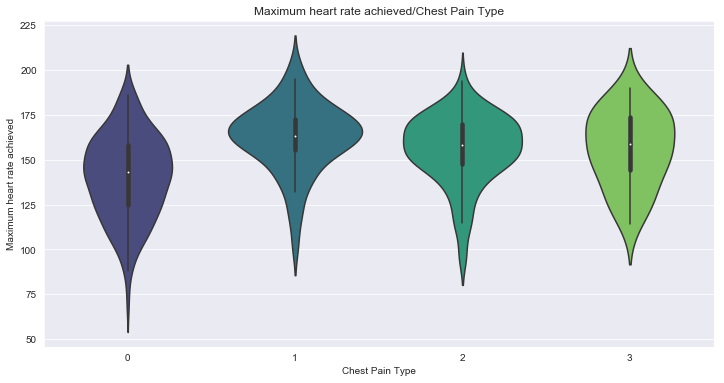

In [18]:
# Plotting the distribution of Maximum heart rate achieved (thalach) per Chest Pain Type (cp)

plt.figure(figsize=(12,6))
sns.violinplot(x=df["cp"],y=df["thalach"],palette="viridis")
plt.xlabel("Chest Pain Type")
plt.ylabel("Maximum heart rate achieved")
plt.title("Maximum heart rate achieved/Chest Pain Type");

#### Conclusions:


* Understanding and recognising the pattern between **Chest Pain Types** and **Maximum heart rate achieved**, where as the **Chest Pain Type** severity increases also the **Maximum heart rate achieved** increases, so the *distribution* mean/averages (of **Maximum heart rate achieved**) increases as the **Chest Pain Type** severity increases


* Curiosity that **Chest Pain Type 1** (**Value 2: atypical angina**) and **Type 2** (**Value 3: non-anginal pain**) are similarly distributed in terms of **Maximum heart rate achieved** values

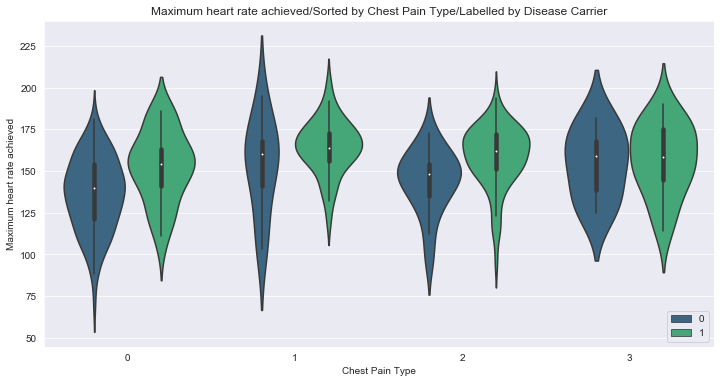

In [19]:
# Here a more detailed than the above plot, this time is labelled by Disease Carrier or not

plt.figure(figsize=(12,6))
sns.violinplot(x=df["cp"],y=df["thalach"],hue=df["target"],palette="viridis")
plt.xlabel("Chest Pain Type")
plt.ylabel("Maximum heart rate achieved")
plt.title("Maximum heart rate achieved/Sorted by Chest Pain Type/Labelled by Disease Carrier")
plt.legend(loc=4);

#### Conclusions:


* Here again the same as previous plot but this time labelled by **Disease Carriers** vs **non-Disease Carriers**


* We can here distinguish the **difference** where **Disease Carriers** shown in general higher **Maximum heart rate achieved** values than **non-Disease Carriers**

## Now lets visualize some plots by slope of the peak exercise ST segment

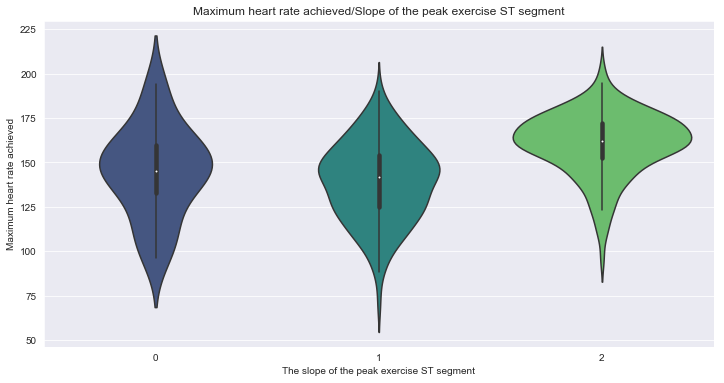

In [20]:
# Plotting Maximum heart rate achieved (thalach) per slope of the peak exercise ST segment (slope)

plt.figure(figsize=(12,6))
sns.violinplot(x=df["slope"],y=df["thalach"],palette="viridis")
plt.xlabel("The slope of the peak exercise ST segment")
plt.ylabel("Maximum heart rate achieved")
plt.title("Maximum heart rate achieved/Slope of the peak exercise ST segment");

#### Conclusions:


* So considering the following:
    * **Value 1: upsloping** (**upsloping** is when analysing a ECG the "heart rate line" is **greater/increasing** (abnormal) after a heart pump creating a **"upsloping ST segment"**)
    * **Value 2**: **flat** (it means a **flat** (you can see it as "horizontalish" line) "heart rate line" results after a heart pump, meaning that it's neither **concave** nor **convex**
    * **Value 3**: **downsloping** (**downsloping** is when analysing a ECG the "heart rate line" is **smaller/decreasing** (abnormal) after a heart pump creating a **"downsloping ST segment"**)


* So with this info it means that people with a **Value 1: upsloping** (**"upsloping ST segment"**) tend to reach lower **Maximum heart rate achieved** values than **Value 3: downsloping** (**"downsloping ST segment"**) wich seems to have the **Maximum heart rate achieved** higher *distribution mean values* with a much *smaller distribution*


* With this **Value 2: flat** being in the middle


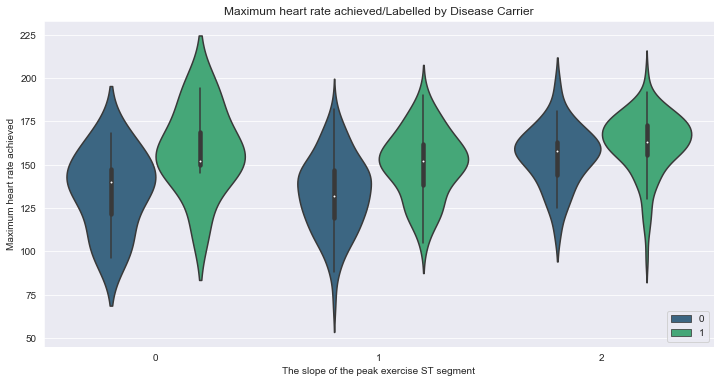

In [21]:
# A little more detailed than the above plot this time labelled by Disease Carrier or not

plt.figure(figsize=(12,6))
sns.violinplot(x=df["slope"],y=df["thalach"],hue=df["target"],palette="viridis")
plt.xlabel("The slope of the peak exercise ST segment")
plt.ylabel("Maximum heart rate achieved")
plt.title("Maximum heart rate achieved/Labelled by Disease Carrier")
plt.legend(loc=4);

#### Conclusions:


* Again the same plot as the previous one but this time labelled by **Disease Carriers** vs **non-Disease Carriers**


* Distinguishing again the **Maximum heart rate achieved** of **Disease Carriers** (in general higher) vs **non-Disease Carriers**

Text(0.5, 1.0, 'Number Female vs Male')

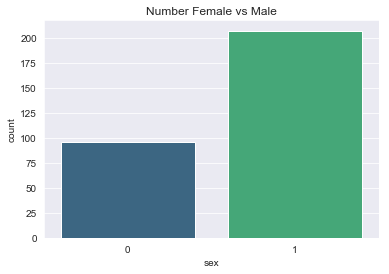

In [22]:
sns.countplot(df["sex"],palette="viridis")
plt.title("Number Female vs Male")

#### Conclusions:


* With this countplot() visualizing the **Male** observations than **Female** observations

Text(0.5, 1.0, 'Non-Disease Carriers vs Disease Carriers')

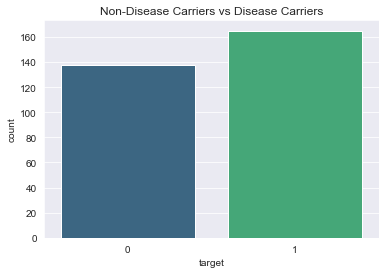

In [111]:
sns.countplot(df["target"],palette="viridis")
plt.title("Non-Disease Carriers vs Disease Carriers")

#### Conclusions:


* At least the **Disease Carriers** vs **non-Disease Carriers** cases number is balanced (wich is a good thing!)

### Getting some more correlated features plots

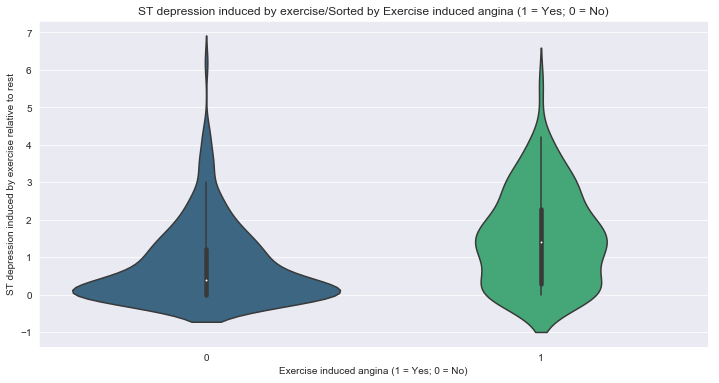

In [26]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df["exang"],y=df["oldpeak"],palette="viridis")
plt.xlabel("Exercise induced angina (1 = Yes; 0 = No)")
plt.ylabel("ST depression induced by exercise relative to rest")
plt.title("ST depression induced by exercise/Sorted by Exercise induced angina (1 = Yes; 0 = No)");

#### Conclusions:


* Exercise that **didn't induce angina** resulted (in general) in much lower **ST depression values**


* While for exercise that **did induce angina** we got higher **ST depression results** (in a much better distributed way)

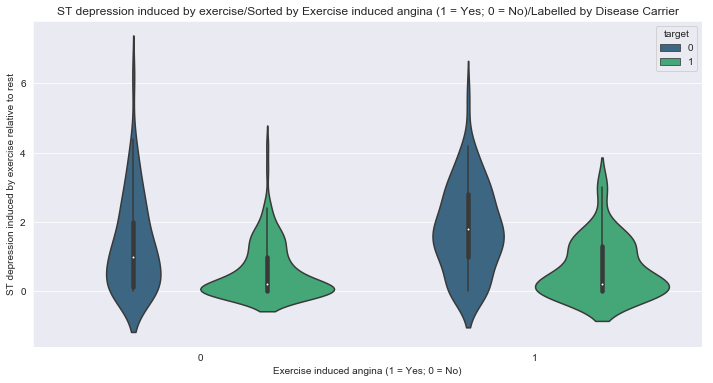

In [27]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df["exang"],y=df["oldpeak"],hue=df["target"],palette="viridis")
plt.xlabel("Exercise induced angina (1 = Yes; 0 = No)")
plt.ylabel("ST depression induced by exercise relative to rest")
plt.title("ST depression induced by exercise/Sorted by Exercise induced angina (1 = Yes; 0 = No)/Labelled by Disease Carrier");

#### Conclusions:


* And again the same as previous plot but this time labelled by **Disease Carriers** vs **non-Disease Carriers**


* So **Disease Carriers** tend to have much *smaller* **ST depression** than **non-Disease Carriers**

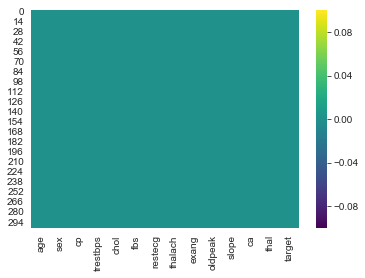

In [28]:
# Checking if there is any missing data (it doesn't)
sns.heatmap(df.isnull(),cmap="viridis")

# Lets try with Logistic Regression

### Splitting data into training set and test set

In [29]:
# Getting the name of Data Frame's columns

df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop("target",axis=1)

y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

### Creating Logistic model

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
# Choose liblinear here because from all I got the best results and is best fitted to small datasets (this one got 303 observations)

logmodel = LogisticRegression(solver="liblinear")

### Training model

In [34]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

### Getting predictions from model

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
# Predicted test values

predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [37]:
# Real test values (first 5)

y_test.head()

221    0
8      1
89     1
154    1
201    0
Name: target, dtype: int64

### Evaluating model throught test set

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
# Getting some detailed information on model's test predicted precision

print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[35  9]
 [ 2 45]]


              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.83      0.96      0.89        47

   micro avg       0.88      0.88      0.88        91
   macro avg       0.89      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91



In [40]:
# Final error mean

np.mean(y_test != predictions)

0.12087912087912088

# Now with KNN

### Standardizing data

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
# Fitting standerdizer with the DataFrame data (without the labels)

scaler.fit(df.drop("target",axis=1))

C:\Users\André\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
# Creating np array with the scaled features (without the labels) using the standerdizer (scaler) already fitted

scaled_features = scaler.transform(df.drop("target",axis=1))

C:\Users\André\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [45]:
scaled_features

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [46]:
# Creating a scaled/standardized version of the DataFrame

df_feat = pd.DataFrame(data=scaled_features,columns=df.columns[:-1])

In [47]:
# Scaled features DataFrame (first 5 rows)

df_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


### Splitting data into training set and test set

In [48]:
X = df_feat

y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

### Creating KNN model

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# Starting with 1 near neighbor and later on I'll tweek/improve the model

knn = KNeighborsClassifier(n_neighbors=1)

### Training model

In [51]:
# Feeding in the training set data

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Getting predictions from model

In [52]:
# Predicted test values

predictions = knn.predict(X_test)
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [53]:
# Real test values (first 5)

y_test.head()

221    0
8      1
89     1
154    1
201    0
Name: target, dtype: int64

### Evaluating model throught test set

In [54]:
# Getting some detailed information on model's test predicted precision

print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[32 12]
 [ 8 39]]


              precision    recall  f1-score   support

           0       0.80      0.73      0.76        44
           1       0.76      0.83      0.80        47

   micro avg       0.78      0.78      0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



### Now squeeze/tweek the model

In [55]:
# Trying out a wide range of near neighbors from 1 to 39, for each one we will train the model get preds and get mean error

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred_i))

In [56]:
error_rate

[0.21978021978021978,
 0.18681318681318682,
 0.16483516483516483,
 0.17582417582417584,
 0.14285714285714285,
 0.16483516483516483,
 0.12087912087912088,
 0.16483516483516483,
 0.14285714285714285,
 0.16483516483516483,
 0.12087912087912088,
 0.14285714285714285,
 0.0989010989010989,
 0.14285714285714285,
 0.15384615384615385,
 0.16483516483516483,
 0.13186813186813187,
 0.14285714285714285,
 0.14285714285714285,
 0.12087912087912088,
 0.14285714285714285,
 0.14285714285714285,
 0.15384615384615385,
 0.14285714285714285,
 0.13186813186813187,
 0.13186813186813187,
 0.13186813186813187,
 0.14285714285714285,
 0.14285714285714285,
 0.15384615384615385,
 0.15384615384615385,
 0.14285714285714285,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.14285714285714285]

Text(0, 0.5, 'Error Rate')

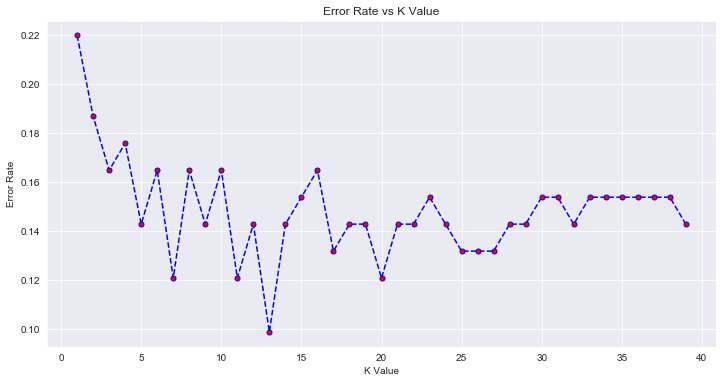

In [57]:
# Visualizing and tracking the Error Rate for each K near value

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rate,color="blue",ls="--",marker="o", markerfacecolor="red",markersize=5)
plt.title("Error Rate vs K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")

### Evaluating the tweeked model's predictions throught the test set

In [58]:
# The squeezed/tweeked model

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print("/n")
print(classification_report(y_test,pred))

[[37  7]
 [ 2 45]]
/n
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        44
           1       0.87      0.96      0.91        47

   micro avg       0.90      0.90      0.90        91
   macro avg       0.91      0.90      0.90        91
weighted avg       0.91      0.90      0.90        91



# Now with Decision Trees

### Splitting data into training set and test set

In [59]:
X = df.drop("target",axis=1)

y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

### Creating Decision Tree Model

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtree = DecisionTreeClassifier()

### Training model

In [62]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Getting predictions from model

In [63]:
predictions = dtree.predict(X_test)

In [64]:
# Predicted test values

predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [65]:
# Real test values (first 5)

y_test.head()

221    0
8      1
89     1
154    1
201    0
Name: target, dtype: int64

### Evaluating model throught test set

In [66]:
# Getting some detailed information on model's test predicted precision

print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.66      0.77        44
           1       0.75      0.96      0.84        47

   micro avg       0.81      0.81      0.81        91
   macro avg       0.84      0.81      0.81        91
weighted avg       0.84      0.81      0.81        91



[[29 15]
 [ 2 45]]


# Random Forest time

* Didn't **train/test split** the data, just used the same **split** from previsous **model** because here I'm **creating a new model** and splited data is **raw** (wasn't normalized, scaled, etc. for the previous model) so it is **useful** for this new model

### Creating Random Forest model

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
# Started by trying estimators = 100 splits per node but we'll try to squeeze/tweek it later on

rfc = RandomForestClassifier(n_estimators=100)

### Training model

In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Getting predictions from model

In [70]:
# Predicted test values

predictions = rfc.predict(X_test)
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [71]:
# Real test values (first 5)

y_test.head()

221    0
8      1
89     1
154    1
201    0
Name: target, dtype: int64

### Evaluating model throught test set

In [72]:
# Getting some detailed information on model's test predicted precision

print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        44
           1       0.81      0.89      0.85        47

   micro avg       0.84      0.84      0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



[[34 10]
 [ 5 42]]


### Now let's squeeze/tweek model (didn't achieve any improvements)

In [104]:
# Trying out a wide range of splits/node from 10 to 200 with steps of 10, for each value it will train, get preds and get mean error

my_estimators = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
error_rate = []

for i in my_estimators:
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error_rate.append(np.mean(y_test != pred_i))

In [105]:
error_rate

[0.23076923076923078,
 0.1978021978021978,
 0.18681318681318682,
 0.18681318681318682,
 0.16483516483516483,
 0.2087912087912088,
 0.17582417582417584,
 0.15384615384615385,
 0.18681318681318682,
 0.18681318681318682,
 0.17582417582417584,
 0.15384615384615385,
 0.1978021978021978,
 0.17582417582417584,
 0.18681318681318682,
 0.16483516483516483,
 0.17582417582417584,
 0.16483516483516483,
 0.18681318681318682,
 0.18681318681318682]

Text(0, 0.5, 'Error Rate')

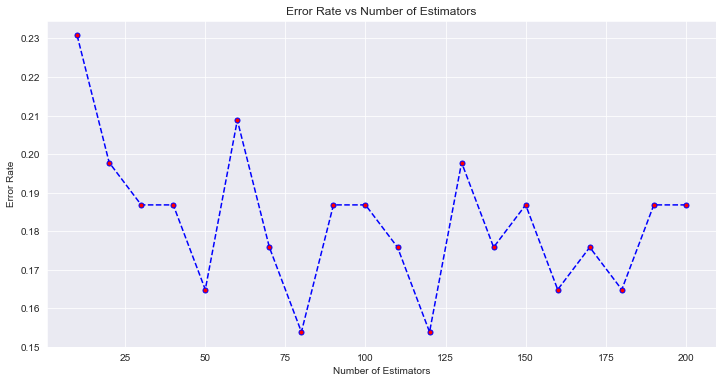

In [106]:
# Visualizing and tracking the Error Rate for each number of splits per node (estimators number)

plt.figure(figsize=(12,6))
plt.plot(my_estimators,error_rate,color="blue",ls="--",marker="o", markerfacecolor="red",markersize=5)
plt.title("Error Rate vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Error Rate")

### Evaluating the tweeked model's predictions throught the test set

In [110]:
# The squeezed/tweeked model

rfc = RandomForestClassifier(n_estimators=80)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

print(confusion_matrix(y_test,predictions))
print("/n")
print(classification_report(y_test,predictions))

[[36  8]
 [ 7 40]]
/n
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       0.83      0.85      0.84        47

   micro avg       0.84      0.84      0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



# Now with SVM

### Splitting data into training set and test set

In [163]:
X = df.drop("target",axis=1)

y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

### Creating Support Vector Machine Model

In [164]:
from sklearn.svm import SVC

In [165]:
# Setting gamma to auto but we will squeeze/tweek our model later

svc = SVC(gamma="auto")

### Training model

In [166]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Getting predictions from model

In [167]:
# Predicted test values

predictions = svc.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [168]:
# Real test values (first 5)

y_test.head()

221    0
8      1
89     1
154    1
201    0
Name: target, dtype: int64

### Evaluating raw model throught test set

In [162]:
# Getting some detailed information on raw model's test predicted precision

print(confusion_matrix(y_test,predictions))
print("/n")
print(classification_report(y_test,predictions))

[[ 0 44]
 [ 0 47]]
/n
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.52      1.00      0.68        47

   micro avg       0.52      0.52      0.52        91
   macro avg       0.26      0.50      0.34        91
weighted avg       0.27      0.52      0.35        91



C:\Users\André\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\André\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\André\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Now let's squeeze/tweek model

In [169]:
# Using GridSearchCV to squeeze/tweek the SVM model
from sklearn.model_selection import GridSearchCV

In [173]:
# Trying different combinations with C (error penalization) gamma (how far the influence of single training example reaches)

param_grid = {"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001]}

grid = GridSearchCV(SVC(),param_grid,verbose=5)

In [174]:
# Testing all combinations (combinations of 5 on 5)

grid.fit(X_train,y_train)

C:\Users\André\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.5555555555555556, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.5571428571428572, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.5571428571428572, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.5555555555555556, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.5571428571428572, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.5571428571428572, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[CV] .... C=1000, gamma=0.001, score=0.6111111111111112, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.5571428571428572, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.5428571428571428, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................. C=1000, gamma=0.0001, score=0.75, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.6571428571428571, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.6571428571428571, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished
C:\Users\André\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [181]:
# Using GridSearchCV attribute cv_results_ (with the array of the results detailed information) and .keys() for respective names

grid_res = pd.DataFrame(grid.cv_results_,columns=grid.cv_results_.keys())

In [193]:
grid_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005663,0.000449,0.003000,2.973602e-07,0.1,1,"{'C': 0.1, 'gamma': 1}",0.555556,0.557143,0.557143,0.556604,0.000752,9,0.557143,0.556338,0.556338,0.556606,0.000379
1,0.006327,0.000447,0.002013,1.967238e-05,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.555556,0.557143,0.557143,0.556604,0.000752,9,0.557143,0.556338,0.556338,0.556606,0.000379
2,0.005325,0.000478,0.002666,4.715392e-04,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.555556,0.557143,0.557143,0.556604,0.000752,9,0.557143,0.556338,0.556338,0.556606,0.000379
3,0.004661,0.000496,0.002013,1.826597e-05,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.555556,0.557143,0.557143,0.556604,0.000752,9,0.557143,0.556338,0.556338,0.556606,0.000379
4,0.004996,0.000002,0.001666,4.724946e-04,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.555556,0.557143,0.557143,0.556604,0.000752,9,0.557143,0.556338,0.556338,0.556606,0.000379


In [184]:
# Getting the best estimator with the best parametters combination

grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [190]:
# Best parametters combination

grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [191]:
# Score for best grid's estimator

grid.best_score_

0.7075471698113207

### Evaluating the tweeked model throught test set

In [192]:
# Getting some detailed information on the tweeked model's test predicted precision

svc = SVC(C=100,gamma=0.0001)
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)

print(confusion_matrix(y_test,predictions))
print("/n")
print(classification_report(y_test,predictions))

[[32 12]
 [ 4 43]]
/n
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        44
           1       0.78      0.91      0.84        47

   micro avg       0.82      0.82      0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



# Now with KMean

* Did experiment **scaling features** using **StandardScaler()** but got much **worst results**...

### Splitting data into training set and test set

In [272]:
X = df.drop("target",axis=1)

y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

### Creating Kmeans model

In [273]:
from sklearn.cluster import KMeans

In [284]:
# Clustering considering Disease Carriers and non-Disease Carriers

kmeans = KMeans(n_clusters=2)

### Training model

In [285]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Getting predictions from model

In [286]:
# Predicted test values

predictions = kmeans.predict(X_test)
predictions

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0])

In [287]:
# Real test values (first 5)

y_test.head()

221    0
8      1
89     1
154    1
201    0
Name: target, dtype: int64

### Evaluating the model throught test data

In [288]:
# Getting some detailed information on the model's test predicted precision

print(confusion_matrix(y_test,predictions))
print("/n")
print(classification_report(y_test,predictions))

[[21 23]
 [14 33]]
/n
              precision    recall  f1-score   support

           0       0.60      0.48      0.53        44
           1       0.59      0.70      0.64        47

   micro avg       0.59      0.59      0.59        91
   macro avg       0.59      0.59      0.59        91
weighted avg       0.59      0.59      0.59        91



# Now with DNN Classifier

### Train/Test splitting and creating feature_columns for the DNN

In [294]:
import tensorflow as tf

In [472]:
# Train/Test split

X = df.drop("target",axis=1)

y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [473]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [474]:
# Creating a list of feature (numeric) columns for each column name in original features DataFrame (X)

feat_cols = []

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [475]:
# The list of each column in X now being a feature_column so it can be fed to our DNN

feat_cols

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='sex', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='cp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='trestbps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='chol', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='fbs', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='restecg', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='thalach', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='exang', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='oldpeak', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericCol

In [566]:
# Creating a function to feed the training set batches (and also set to iterate 30x for each model's step/train)

input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,num_epochs=30,shuffle=True)

### Creating DNN model

In [637]:
# Creating DNN model with 3 layers 10 neurons for 1st layer, 20 neurons for 2nd, 10 for 3rd, and feed in feature_columns created

dnn = tf.estimator.DNNClassifier(hidden_units=[10,20,10],n_classes=2,feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\André\\AppData\\Local\\Temp\\tmp_vk7wj5b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000015A534E7BE0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Training model (did a ~1200 total steps)

In [657]:
dnn.train(input_fn=input_func,steps=300)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\André\AppData\Local\Temp\tmp_vk7wj5b\model.ckpt-918
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 918 into C:\Users\André\AppData\Local\Temp\tmp_vk7wj5b\model.ckpt.
INFO:tensorflow:loss = 10.13214, step = 918
INFO:tensorflow:global_step/sec: 127.312
INFO:tensorflow:loss = 12.189793, step = 1018 (0.788 sec)
INFO:tensorflow:global_step/sec: 134.092
INFO:tensorflow:loss = 9.756575, step = 1118 (0.745 sec)
INFO:tensorflow:Saving checkpoints for 1218 into C:\Users\André\AppData\Local\Temp\tmp_vk7wj5b\model.ckpt.
INFO:tensorflow:Loss for final step: 10.539505.


### Getting predictions from model

In [658]:
# Creating a function to feed the test set so it can be evaluated later on 

pred_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [659]:
# Creating a dictionary with the predictions

predictions = list(dnn.predict(input_fn=pred_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\André\AppData\Local\Temp\tmp_vk7wj5b\model.ckpt-1218
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [660]:
# Predictions dictionary

predictions

[{'logits': array([-3.321433], dtype=float32),
  'logistic': array([0.03484321], dtype=float32),
  'probabilities': array([0.9651568 , 0.03484318], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.6969602], dtype=float32),
  'logistic': array([0.6675135], dtype=float32),
  'probabilities': array([0.33248654, 0.6675135 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.1431008], dtype=float32),
  'logistic': array([0.53571427], dtype=float32),
  'probabilities': array([0.46428573, 0.53571427], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([1.215768], dtype=float32),
  'logistic': array([0.7713179], dtype=float32),
  'probabilities': array([0.22868207, 0.77131796], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': arr

In [661]:
# Extracting only the class id predictions (the real prediction decision) of each input of the test set (X_test)

final_preds = []

for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [662]:
# Predicted test values

final_preds

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0]

In [663]:
# Real test values (first 5)

y_test.head()

221    0
8      1
89     1
154    1
201    0
Name: target, dtype: int64

### Evaluating the model (after ~1200 steps/trains) throught test set

In [664]:
# Getting some detailed information on model's test predicted precision

print(confusion_matrix(y_test,final_preds))
print("\n")
print(classification_report(y_test,final_preds))

[[28 16]
 [ 4 43]]


              precision    recall  f1-score   support

           0       0.88      0.64      0.74        44
           1       0.73      0.91      0.81        47

   micro avg       0.78      0.78      0.78        91
   macro avg       0.80      0.78      0.77        91
weighted avg       0.80      0.78      0.78        91

